Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


EDA & Data Preparation

In [2]:
data = pd.read_csv('/content/data (1).csv')

In [3]:
data.shape

(61, 4)

In [4]:
data.head(10)

,Date,Revenue,UNRATE,PPI
0,1/1/2017,11141.566,4.7,92.5
1,2/1/2017,11483.520,4.6,94.4
2,3/1/2017,89026.192,4.4,94.2
3,4/1/2017,7486.732,4.5,94.4
4,5/1/2017,17719.978,4.4,94.8
5,6/1/2017,159129.659,4.3,94.3
6,7/1/2017,16736.302,4.3,93.2
7,8/1/2017,25432.066,4.4,91.6
8,9/1/2017,145620.785,4.2,95.4
9,10/1/2017,24954.743,4.1,97.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     54 non-null     object 
 1   Revenue  54 non-null     float64
 2   UNRATE   54 non-null     float64
 3   PPI      61 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [6]:
data.index = pd.DatetimeIndex(data['Date'])
data_use = data[['Revenue','UNRATE','PPI']]

In [7]:
data_use.head(10)

,Revenue,UNRATE,PPI
Date,,,
2017-01-01,11141.566,4.7,92.5
2017-02-01,11483.520,4.6,94.4
2017-03-01,89026.192,4.4,94.2
2017-04-01,7486.732,4.5,94.4
2017-05-01,17719.978,4.4,94.8
2017-06-01,159129.659,4.3,94.3
2017-07-01,16736.302,4.3,93.2
2017-08-01,25432.066,4.4,91.6
2017-09-01,145620.785,4.2,95.4


Data Visualization

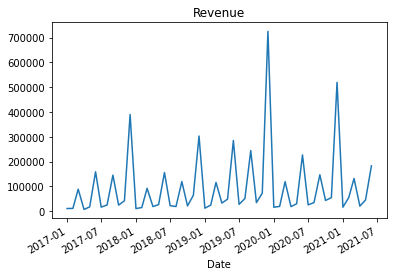

In [8]:
data['Revenue'].plot(title = 'Revenue')

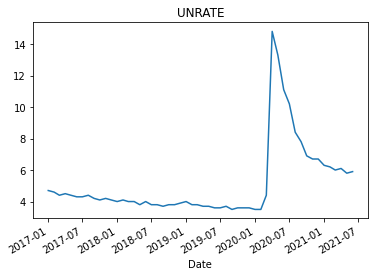

In [9]:
data['UNRATE'].plot(title = 'UNRATE')

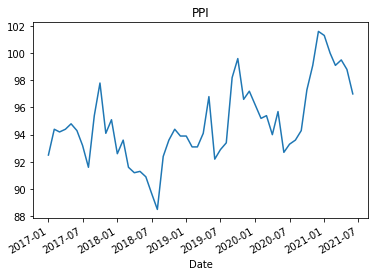

In [10]:
data['PPI'].plot(title = 'PPI')

Model Building

In [11]:
# compute changes
data_ret = np.log(data_use).diff().dropna()
# construct model
model = VAR(data_ret)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Fitting

In [12]:
lags = 4

In [13]:
# Fit model using 'lags' lags
results = model.fit(lags)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Aug, 2021
Time:                     09:55:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.71381
Nobs:                     49.0000    HQIC:                  -10.6483
Log likelihood:           105.295    FPE:                1.39430e-05
AIC:                     -11.2195    Det(Omega_mle):     6.88285e-06
--------------------------------------------------------------------
Results for equation Revenue
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.044836         0.103190            0.434           0.664
L1.Revenue        -0.692525         0.163341           -4.240           0.000
L1.UNRATE         -0.142988         0.657055           -0.218         

Plot autocorrelation function

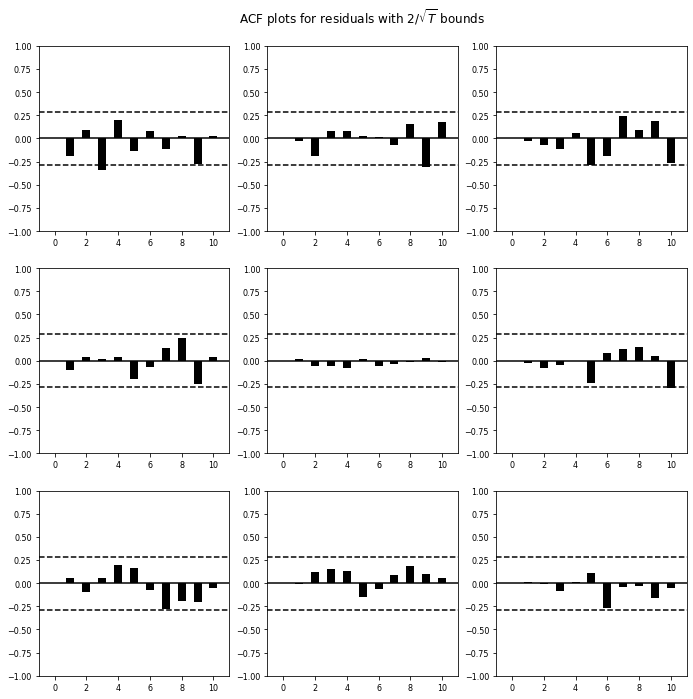

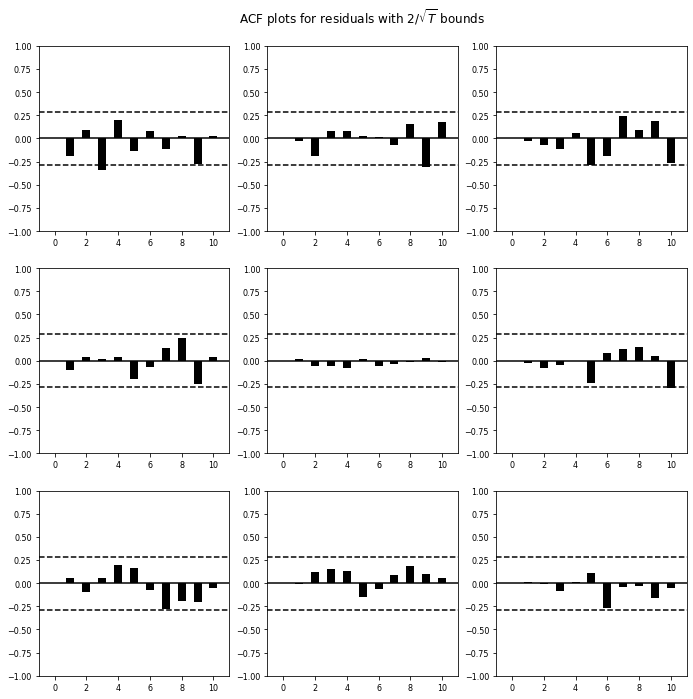

In [14]:
results.plot_acorr()

Forecasting

In [15]:
lag_order = results.k_ar
# forecast 'lags' periods foreward
results.forecast(data_ret.values[-lag_order:],lags)

array([[-1.86044125e+00,  1.44185869e-02,  7.08861784e-03],
       [ 2.87554340e-01, -7.63996401e-02,  1.73357412e-03],
       [ 1.46601595e+00, -1.83416876e-02,  6.48999625e-03],
       [-1.37306524e+00,  6.25359724e-02,  2.43628054e-03]])

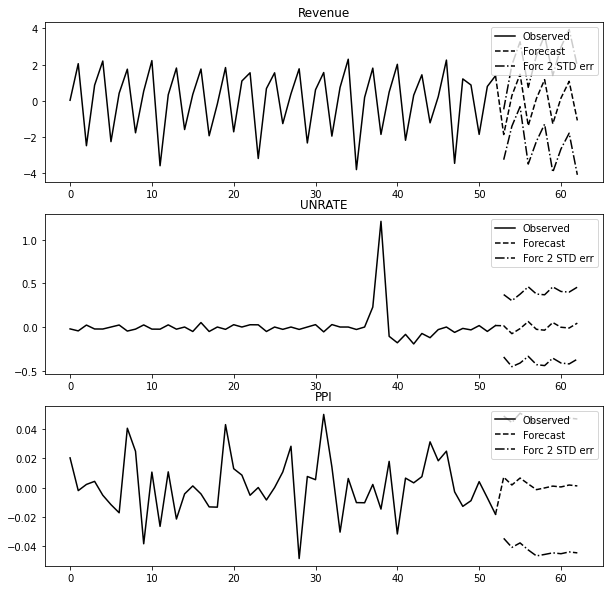

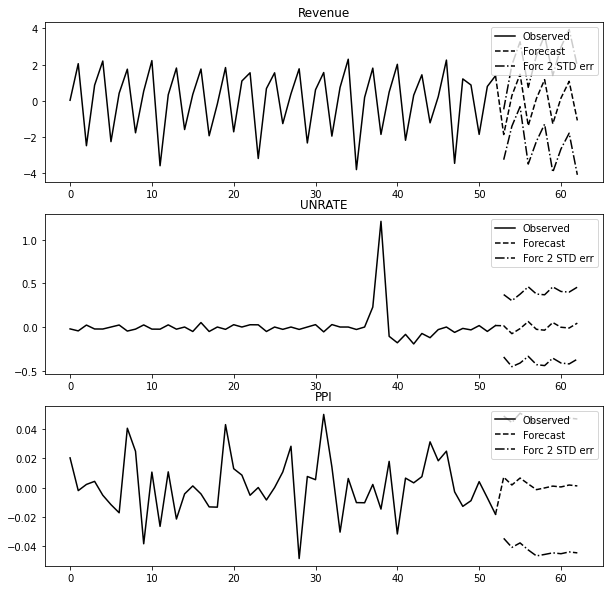

In [16]:
results.plot_forecast(10)

Impulse Response Function (IRF)

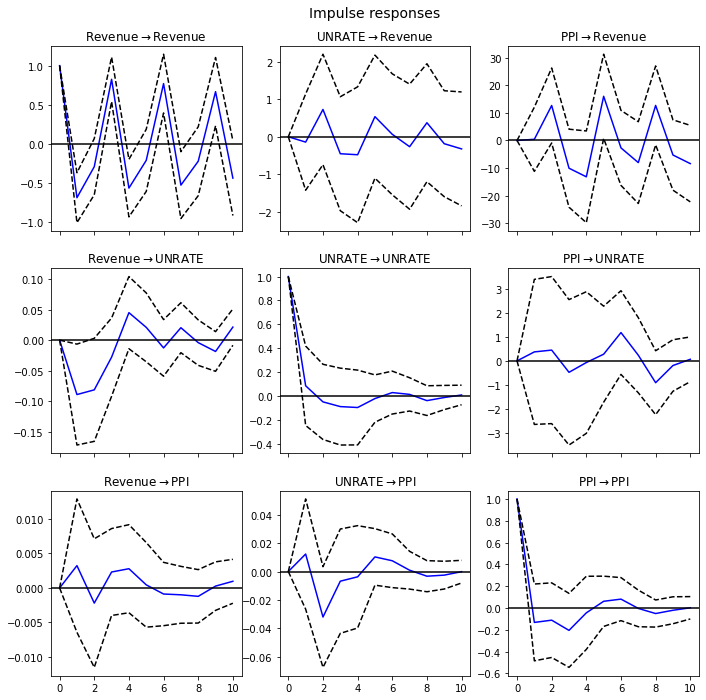

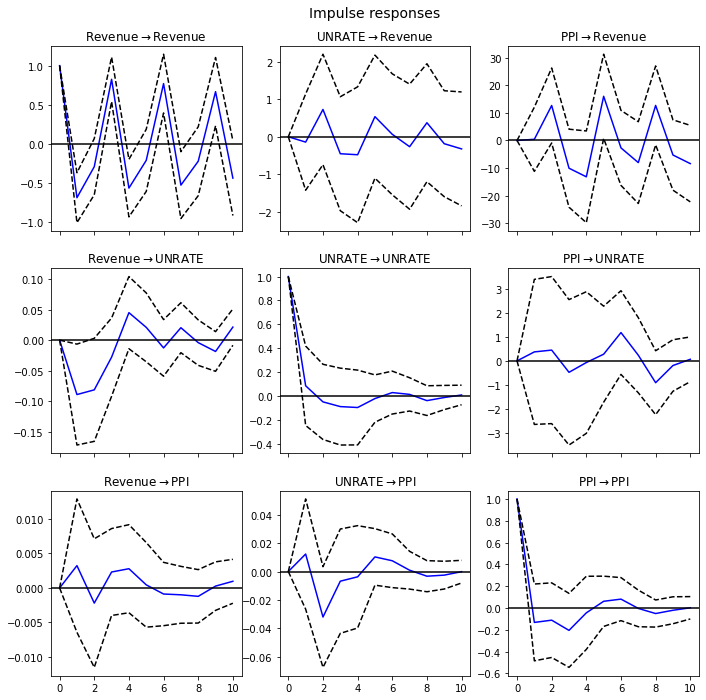

In [17]:
irf = results.irf(10)
irf.plot(orth=False)

Cumulative Effect

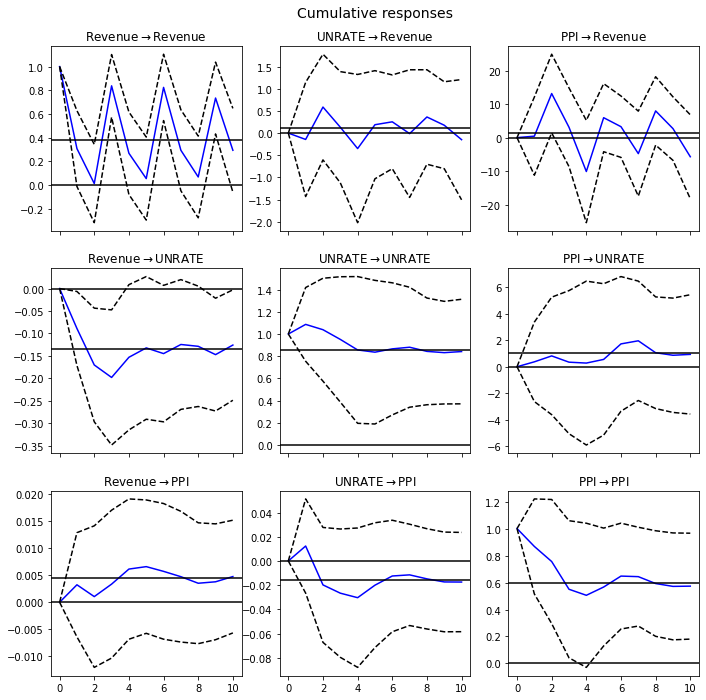

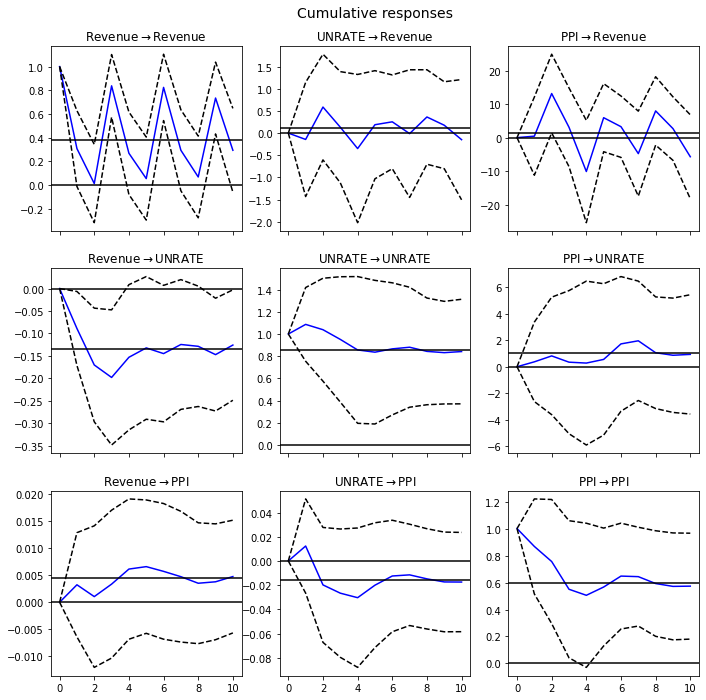

In [18]:
irf.plot_cum_effects(orth=False)